In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
 
sns.set_style('whitegrid')

In [2]:
def get_array_nfe_vals(runtime_file_path):
    # List to hold the extracted NFE values
    nfe_values = []
    
    # Open the file and read line by line
    with open(runtime_file_path, 'r') as file:
        for line in file:
            # Look for lines that start with '//NFE=' and extract the number after it
            match = re.search(r"^//NFE=(\d+)", line)
            if match:
                # Append the NFE value to the list as an integer
                nfe_values.append(int(match.group(1)))
    
    # Now nfe_values contains all the extracted NFE values
    return np.array(nfe_values)

In [24]:
# plot when different number of nfes and not evenly spaced
# define constants 
num_seeds = 1
algorithm = 'borg'
folder_name = '../../../MOEAFramework-4.5/data_borg/Other_SOWs/seed2/'
metric_name = 'Hypervolume'
nfes = [0, 25000, 50000] #, 50000, 100000]

# get nfe values
i = 0
list_nfes = []
modified_arrays2 = []
for seed in range(num_seeds):
    for nfe in nfes:
        print('seed: {}, nfes: {}'.format(seed, nfe))
        # get nfes 
        list_nfes.append(get_array_nfe_vals(folder_name + 'runtime_file_seed_{}_nfe{}.runtime'.format(seed+1, nfe)))
        #print(list_nfes[-1])
        
        # get hypervolumes
        runtime_df = pd.read_csv(f'{folder_name}{algorithm}_S{seed+1}_nfe{nfe}.metrics', delimiter=' ', header=0)
        if metric_name == 'Hypervolume':
            arr = runtime_df['#Hypervolume'].values
        else:
            arr = runtime_df[metric_name].values

        # ensure array is same length as nfe values
        print('size of nfes: {}, size of hypervolume: {}'.format(list_nfes[i].shape[0], len(arr)))
        if list_nfes[i].shape[0] == len(arr):
            # Add the new column to the array
            modified_arr = np.column_stack((list_nfes[i], arr))
            modified_arrays2.append(modified_arr)
        else:
            print(f"Warning: New column size {list_nfes[i].shape[0]} does not match array size for array with shape {arr.shape}")
        
        i += 1



seed: 0, nfes: 0
size of nfes: 250, size of hypervolume: 250
seed: 0, nfes: 25000
size of nfes: 251, size of hypervolume: 251
seed: 0, nfes: 50000
size of nfes: 251, size of hypervolume: 251


In [3]:
# plot when no nfes
# define constants 
num_seeds = 2
algorithm = 'borg'
folder_name = '../../../MOEAFramework-4.5/data_borg/Updated_2April2025/'
metric_name = 'Hypervolume'
list_arrs = []
list_nfes = []
# get nfe values
i = 0
modified_arrays = []
#for seed in range(len(list_nfes)):
#for seed in range(num_seeds):   
for seed in np.arange(1, 5):
    print('seed: {}'.format(seed))
        
    # get hypervolumes
    runtime_df = pd.read_csv(f'{folder_name}{algorithm}_S{seed}_nfe0.metrics', delimiter=' ', header=0) # _nfe0
    #print(runtime_df)
    if metric_name == 'Hypervolume':
        arr = runtime_df['#Hypervolume'].values
    else:
        arr = runtime_df[metric_name].values
    list_arrs.append(arr)
    
    # get nfes 
    list_nfes.append(get_array_nfe_vals(folder_name + 'runtime_file_seed_{}_nfe0.runtime'.format(seed)))
    # ensure array is same length as nfe values
    #     print('size of nfes: {}, size of hypervolume: {}'.format(list_nfes[i].shape[0], len(arr)))
    if list_nfes[i].shape[0] == len(arr):
        # Add the new column to the array
        modified_arr = np.column_stack((list_nfes[i], arr))
        modified_arrays.append(modified_arr)
    else:
        print(f"Warning: New column size {list_nfes[i].shape[0]} does not match array size for array with shape {arr.shape}")
    i += 1

seed: 1
seed: 2
seed: 3
seed: 4


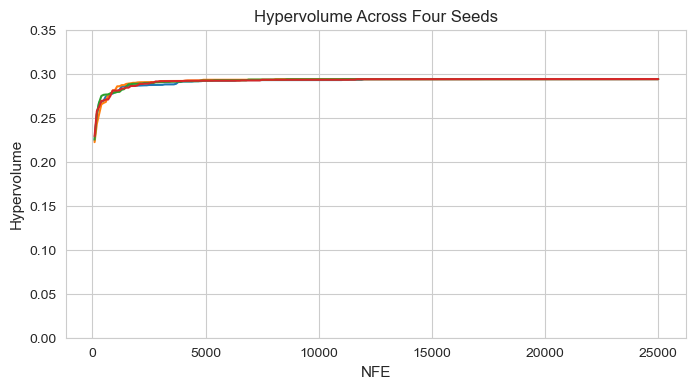

In [ ]:
# plot the hypervolume over time
fig, ax = plt.subplots(figsize=(8, 4))
 
#for i in range(num_seeds):
for i in range(len(list_nfes)):
    #ax.plot(list_arrs[i][:,0], list_arrs[i][:,1], label='seed: {}'.format(i))
    ax.plot(modified_arrays[i][:,0], modified_arrays[i][:,1], linewidth=1.5)
    #ax.plot(modified_arrays2[i][:,0], modified_arrays2[i][:,1], linewidth=1.5, linestyle='--')
# ax.plot(np.arange(freq, NFE+freq, freq), hvol_matrix[1], color='blue', linewidth=1.5,label='Seed 1')
#  
ax.set_xlabel('NFE', fontsize=11)
# ax.set_xlim([freq, NFE+freq])
ax.set_ylabel(metric_name, fontsize=11)
ax.set_ylim([0, 0.35])
# ax.set_title(f'{metric_name} over time')
# ax.legend(loc='upper left')
ax.set_title('Hypervolume Across Four Seeds')
plt.savefig('../../outputs/hypervolume.png', dpi=300, bbox_inches='tight')
plt.show()